# Nonlinear Equations

In [59]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline

### Bisection method:

In [87]:
def bisection(f, a, b, eps=1.0e-15, n_max=500):
    n = 0
    while n < n_max:
        c = (a + b) / 2.0
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
        if abs(b - a) < eps:
            print("root found within tolerance", eps, "using", n, "iterations")
            return (a + b) / 2.0
        n += 1
    raise RuntimeError("no root found within tolerance", eps, "using", n_max, "iterations")

root found within tolerance 1e-15 using 50 iterations
0.5671432904097835


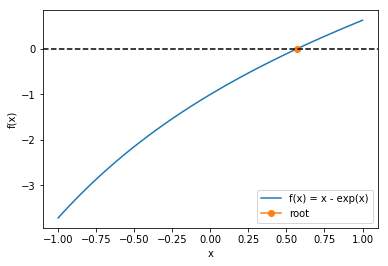

In [88]:
def f(x):
    return x - np.exp(-x)

root = bisection(f, -1., 1)
print(root)

x = np.linspace(-1.0, 1.0, 100)

fig, ax = plt.subplots()
ax.plot(x, f(x), label="f(x) = x - exp(x)")
ax.plot(root, f(root), marker="o", label="root")
ax.axhline(y=0.0, color="black", linestyle="--")
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.legend(loc="lower right")

### Secant method:

How to find the point where the secant line intersects the x-axis?

First, we find an equation of line $ f(x) = px + q $ passing through two points $ [a, f(a)] $ and $ [b, f(b)] $. The slope of the line $ p $ and the coefficient $ q $ can be easily obtained using basic algebra,

$$ p = \frac{f(b) - f(a)}{b - a}, \quad q = f(a) - \frac{f(b) - f(a)}{b - a} a . $$

The point where the secant line intersects the x-axis can be obtained by solving $ f(x) = 0 $,

$$ x = \frac{a f(b) - b f(a)}{f(b) - f(a)}. $$



In [89]:
def secant_method(f, a, b, eps=1.0e-15, n_max=500):
    n = 0
    while n < n_max:
        c = (f(b) * a - f(a) * b) / (f(b) - f(a))
        a = b
        b = c
        if abs(b - a) < eps:
            print("root found within tolerance", eps, "using", n, "iterations")
            return (a + b) / 2.0
        n += 1
    raise RuntimeError("no root found within tolerance", eps, "using", n_max, "iterations")

In [90]:
def f(x):
    return x - np.exp(-x)

root = secant_method(f, -1.0, 1.0)
print(root)

root found within tolerance 1e-15 using 6 iterations
0.567143290409784


### False position method:

In [91]:
def false_position_method(f, a, b, eps=1.0e-15, n_max=500):
    n = 0
    while n < n_max:
        c = (f(b) * a - f(a) * b) / (f(b) - f(a))
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
        if abs(b - a) < eps:
            print("root found within tolerance", eps, "using", n, "iterations")
            return (a + b) / 2.0
        n += 1
    raise RuntimeError("no root found within tolerance", eps, "using", n_max, "iterations")

In [92]:
def f(x):
    return x - np.exp(-x)

root = false_position_method(f, -1.0, 1.0)
print(root)

root found within tolerance 1e-15 using 33 iterations
0.567143290409784


### Newton-Raphson method:

In [93]:
def newton_raphson(f, df, x0, eps=1.0e-15, n_max=500):
    n = 0
    while n < n_max:
        x1 = x0 - f(x0) / df(x0)
        if abs(x1 - x0) < eps:
            print("root found within tolerance", eps, "using", n, "iterations")
            return x1
        x0 = x1
        n += 1
    raise RuntimeError("no root found within tolerance", eps, "using", n_max, "iterations")

In [94]:
def f(x):
    return x - np.exp(-x)

def analytic_df(x):
    return 1 + np.exp(-x)

root = newton_raphson(f, analytic_df, 0.0)
print(root)

root found within tolerance 1e-15 using 5 iterations
0.5671432904097838


In [95]:
def f(x):
    return x - np.exp(-x)

def numeric_df(x):
    h = 1.0e-8
    return (f(x + h) - f(x)) / h

root = newton_raphson(f, numeric_df, 0.0)
print(root)

root found within tolerance 1e-15 using 5 iterations
0.5671432904097838


In [96]:
def df_dx(f, x, y, h):
    return (f(x + h, y) - f(x, y)) / h

def df_dy(f, x, y, h):
    return (f(x, y + h) - f(x, y)) / h

def newton_raphson_2d(f1, f2, x0=0, y0=0, eps=1.0e-15, n_max=500):
    n = 0
    J = np.zeros((2, 2))
    b = np.zeros(2)
    while n < n_max:
        J[0][0] = df_dx(f1, x0, y0, 1.0e-6)
        J[0][1] = df_dy(f1, x0, y0, 1.0e-6)
        J[1][0] = df_dx(f2, x0, y0, 1.0e-6)
        J[1][1] = df_dy(f2, x0, y0, 1.0e-6)
        b[0] = -f1(x0, y0)
        b[1] = -f2(x0, y0)
        delta = la.solve(J, b)
        x1 = x0 + delta[0]
        y1 = y0 + delta[1]
        if max(abs(x1 - x0), abs(y1 - y0)) < eps:
            print("root found within tolerance", eps, "using", n, "iterations")
            return [x1, y1]
        x0 = x1
        y0 = y1
        n += 1
    raise RuntimeError("no root found within tolerance", eps, "using", n_max, "iterations")

root found within tolerance 1e-15 using 5 iterations
0.6371078452969543 0.7188187186922144


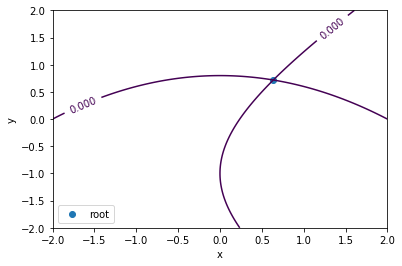

In [97]:
def f1(x, y):
    return x**2 + 4*x - y**2 - 2*y - 1

def f2(x, y):
    return x**2 + 5*y - 4

root = newton_raphson_2d(f1, f2)
print(root[0], root[1])

x = np.linspace(-2.0, 2.0, 100)
y = np.linspace(-2.0, 2.0, 100)
X, Y = np.meshgrid(x, y)
Z1 = f1(X, Y)
Z2 = f2(X, Y)

fig, ax = plt.subplots()
a = ax.contour(X, Y, Z2, 0.0)
b = ax.contour(X, Y, Z1, 0.0)
ax.clabel(a)
ax.clabel(b)
ax.scatter(root[0], root[1], label='root')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc='lower left')